In [1]:
import numpy as np
import qutip as qt

import matplotlib.pyplot as plt

In [2]:
# We need to cut off the size of the Hilbert space at a large enough number of occupation
n_sites = 1000

# We need to pick large enough initial and final times
t_list = np.linspace(-100, 100, 10000)

alpha = 0.01

# The components of the Hamiltonian
h_0 = qt.create(n_sites) * qt.destroy(n_sites) + 1 / 2
w = qt.QobjEvo([[qt.create(n_sites) + qt.destroy(n_sites), lambda t: -alpha * np.exp(-t**2)]])

# Solve the Schrodinger equation from the initial state |0> and obtain the time-evolved states
states = qt.sesolve(h_0 + w, qt.basis(n_sites), t_list, options={'atol': 1e-10, 'rtol': 1e-10}).states

numerical_probability = np.abs(states[-1][1].item())**2
perturbation_theory_probability = np.pi * alpha ** 2 * np.exp(-1/2)
relative_error = np.abs(numerical_probability - perturbation_theory_probability) / numerical_probability

print("Probability of finding |1> at time +infinity\n")
print(f"Numerical value:                            {numerical_probability:.5e}")
print(f"Value at first order perturbation theory:   {perturbation_theory_probability:.5e}")
print(f"\nRelative error: {relative_error:.2e}")

Probability of finding |1> at time +infinity

Numerical value:                            1.90510e-04
Value at first order perturbation theory:   1.90547e-04

Relative error: 1.97e-04


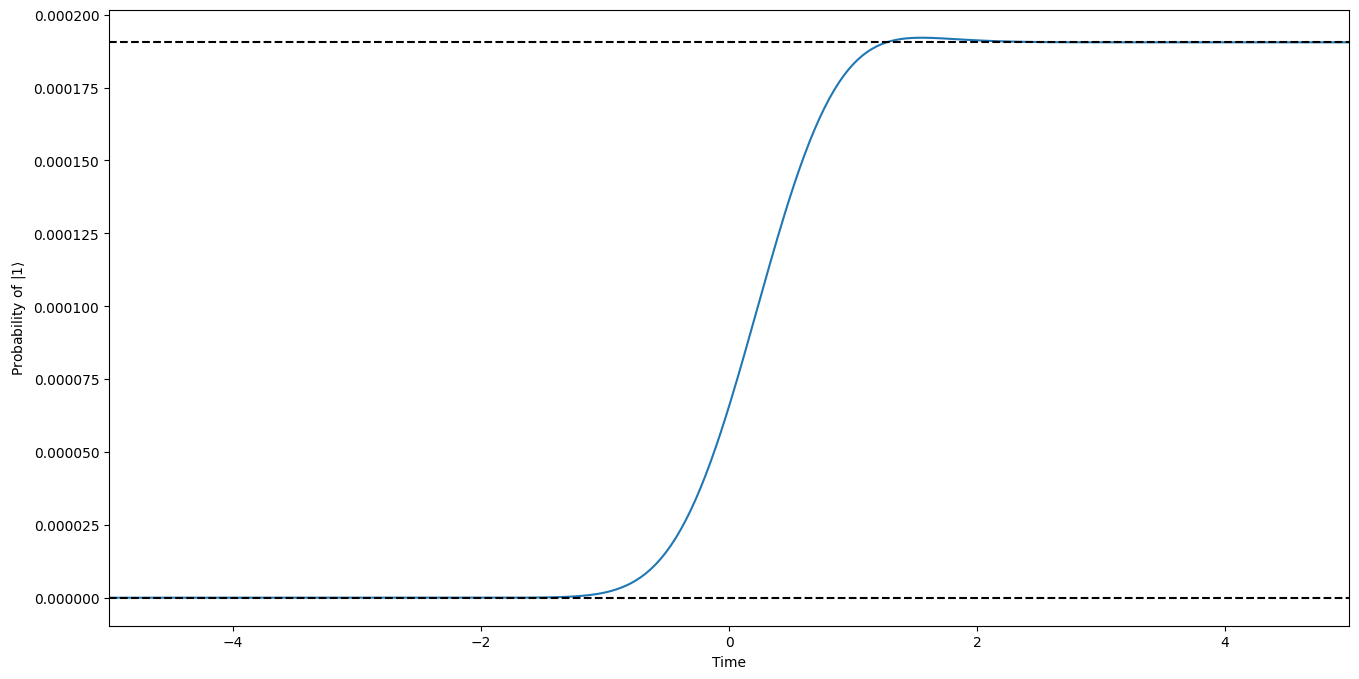

In [3]:
plt.figure(figsize=(16,8))

plt.plot(t_list, [np.abs(states[k][1].item())**2 for k in range(len(t_list))])
plt.xlim(-5, 5)
plt.xlabel("Time")
plt.ylabel(r"Probability of $| 1 \rangle$")
plt.axhline(0, c='k', ls='--')
plt.axhline(perturbation_theory_probability, c='k', ls='--')